# Stanford CME 241 (Winter 2025) - Assignment 3

**Due: Sunday, February 23 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/ranystephan/RL-book/blob/master/ranycs_assts_solving/ranycs_asst1/ranycs_assignment3.ipynb

https://github.com/cocosrv/technical-documents/blob/master/finance/cme241/assignments/Winter2025/assignment3.ipynb

*Group members (replace below names with people in your group):* 
- Rany Stephan - ranycs@stanford.edu
- Corentin Servouze - cosrv@stanford.edu

## Imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('/Users/ranystephan/Desktop/problemst/cme241/RL-book/')
from scipy.optimize import minimize_scalar
from typing import Iterable, Iterator, Mapping, TypeVar, Callable, Sequence, Tuple, Dict
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovRewardProcess
from rl.chapter10.prediction_utils import compare_td_and_mc
X = TypeVar('X')
S = TypeVar('S')

## Question 1: Milk Vendor Optimization Problem (Led by Rany)

You are a milk vendor and your task is to bring to your store a supply (denoted $S \in \mathbb{R}$) of milk volume in the morning that will give we the best profits. You know that the demand for milk throughout the course of the day is a probability distribution function $f$ (for mathematical convenience, assume people can buy milk in volumes that are real numbers, hence milk demand $x \in \mathbb{R}$ is a continuous variable with a probability density function). 

For every extra gallon of milk wecarry at the end of the day (supply $S$ exceeds random demand $x$), you incur a cost of $h$ (effectively the wasteful purchases amounting to the difference between your purchase price and the end-of-day discount disposal price since you are not allowed to sell the same milk the next day). For every gallon of milk that a customer demands that you don’t carry (random demand $x$ exceeds supply $S$), you incur a cost of $p$ (effectively the missed sales revenue amounting to the difference between your sales price and purchase price). 

Your task is to identify the optimal supply $S$ that minimizes your **Expected Cost** $g(S)$, given by:

$$
g_1(S) = \mathbb{E}[\max(x - S, 0)] = \int_{S}^{\infty} (x - S) \cdot f(x) \, dx
$$

$$
g_2(S) = \mathbb{E}[\max(S - x, 0)] = \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$

$$
g(S) = p \cdot g_1(S) + h \cdot g_2(S)
$$

---

### Part (A): Analytical Optimization

1. **Derive the first-order condition (FOC)** for minimizing the expected cost $g(S)$.
2. **Solve the FOC** to express the optimal supply $S^*$ in terms of the given parameters: $p$, $h$, and the demand distribution $f(x)$. (*Hint*: Pay attention to the balance between the costs of overstocking and understocking)

3. **Interpretation**: Provide an interpretation of the condition you derived. What does the balance between $p$ and $h$ imply about the optimal supply $S^*$?

---

### Part (B): Special Case Analysis

1. Consider the case where the demand $x$ follows an **exponential distribution** with parameter $\lambda > 0$. That is, $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$.
    - Derive an explicit expression for the optimal supply $S^*$.
    
2. Consider the case where the demand $x$ follows a **normal distribution** with mean $\mu$ and variance $\sigma^2$, i.e., $x \sim \mathcal{N}(\mu, \sigma^2)$. 
    - Set up the integral for $g(S)$ and describe how it relates to the **cumulative distribution function (CDF)** of the normal distribution.
    - Provide an interpretation of how changes in $\mu$ and $\sigma$ influence the optimal $S^*$. 

---

### Part (C): Framing as a Financial Options Problem

1. Frame the milk vendor’s problem as a **portfolio of call and put options**:
    - Identify the analog of the “strike price” and “underlying asset.”
    - Explain which part of the cost function $g_1(S)$ or $g_2(S)$ corresponds to a call option and which part to a put option.
    - What do $p$ and $h$ represent in this options framework?

2. Explain how this framing could be used to derive the optimal supply $S^*$ if solved using financial engineering concepts.

---

### Part (D): Numerical Solution and Simulation

1. **Numerical Solution**: Write a Python function that numerically estimates the optimal $S^*$ using an iterative search or numerical optimization method. 

2. **Simulation**: Generate random samples of milk demand from an exponential distribution and simulate the total costs for different values of $S$. Plot the costs against $S$ and visually identify the optimal $S$.

### Part (A) Answer

<span style="color:red">

We want to derive the first-order condition (FOC) for minimizing the expected cost $g(S)$. 

We first compute $g_1'(S)$

$$ 
\frac{d}{dS}g_1(S) = \frac{d}{dS} \int_{S}^{\infty} (x-S).f(x)dx = \int_{S}^{\infty} \frac{\partial}{\partial S}((x - S)f(x))dx - (S-S)f(S) \frac{d}{dS}S 
$$

by Leibniz's rule. 

Ultimately, 

$$
g'_1 (S) = \int_{S}^{\infty} -f(x)dx = -(1-F(S))
$$

We now compute $g_2'(S)$. 

Again, by Leibniz's rule, we have 

$$
g_2'(S) = \int_{-\infty}^{S} ((S-x)f(x))dx + (S-S)f(S) \frac{d}{dS}S = \int_{-\infty}^{S} f(x)dx = F(S)
$$

So, 

$$
g' (S) = p(-(1-F(S))) + hF(S)
$$

We now set it to zero to get the FOC.  

$$ 
g'(S) = 0 \implies F(S) = \frac{p}{p+h}
$$

Therefore, we get that $F(S^*) = \frac{p}{p+h}$ 

So, 

$$
S^* = F^{-1} (\frac{p}{p+h})
$$


This indicates that the optimal supply $S^*$ is chosen such that if the cost of understocking $p$ is high relative to the cost of overstocking $h$, which implies that $\frac{p}{p+h}$ is closer to 1, then we have to choose a higher $S^*$ to reduce the chance of a stockout. 

Now, if $h$ is high relative to $p$. then $\frac{p}{p+h}$ is smaller, so we choose a lower $S^*$ to avoid the higher costs associated with holding excess milk. 

This balance ensures that the marginal cost of having one more unit of milk on hand, risking waste, is exactly balanced with the marginal cost of missing a sale. 



</span>

### Part (B) Answer

<span style="color:red">

1) We have that the quantile function of the exponential is 

$$
F^{-1}(p) = \frac{-ln(1-p)}{\lambda}, \quad 0 \leq p < 1
$$

Therefore, we have here that 

$$
S^* = \frac{-ln(1-\frac{p}{p+h})}{\lambda}
$$


2) We have that if it is normal, then 

$$
F(x) = \Phi(\frac{x-\mu}{\sigma})
$$

Therefore, similar as before, by taking the quantile function of the Normal, we get 

$$
S^* = \mu + \sigma \Phi^{-1} (\frac{p}{p+h})
$$


</span>

### Part (C) Answer

<span style="color:red">

In this problem, we can see that the semantics of the supply ressemble closely that of the stock price, as it is characterized by a random variable. Similarly, the task of the problem is to choose the supply $S$ of milk (volume) as to maximize our profit. This is analogous to saying that we have to choose the strike price $K$ of an option that will give us the best profit. 

Now, when it comes to $g_1(S)$ and $g_2(S)$, it becomes apparent that: 

- $g_1(S)$ can be viewed as a call option. The payoff $max(x-S, 0)$ resembles a call option payoff, where $S$ acts like a strike price and $x$ is the "price", here, the demand. A call option is in the money when $x > S$, which is coherent with this problem of having a stockout. 

- $g_2(S)$ can be viewed as a put option. In fact, the payoff $max(S-x, 0)$ resembles a put option payoff, again with $S$ as strike price. A put option is in the money when $S>x$, similar to incurring a cost for unsold milk. 


Now, continuing with our reasoning, $p$, the penalty cost for understocking is associated with the cost of missing the upside, or in this case not being able to sell when demand is high. This is the opportunity cost of a call option, or more precisely the cost per unit when a call option is in the money (losing out on a sale). 

Moreover, the holding cost for overstocking, $h$, corresponds to the cost of overstock, which is similar to the cost when a put option is in the money (when we have unsold inventory). 

</span>

### Part (D) Answer

In [3]:
'''
fill in the code below, and then run the code in the next cell for the simulation
'''

# simulation parameters
p = 5  # Cost of understocking (per unit)
h = 2  # Cost of overstocking (per unit)
lambda_param = 1.0  # Parameter for exponential distribution

# Probability density function for demand
def demand_pdf(x):
    return lambda_param * np.exp(-lambda_param * x) if x >= 0 else 0

# Cumulative distribution function for demand
def demand_cdf(x):
    return 1 - np.exp(-lambda_param * x) if x >= 0 else 0

# Expected cost function g(S)
def expected_cost(S):
    # g1(S): Understocking cost
    g1 = p * (np.exp(-lambda_param * S) / lambda_param)
    
    # g2(S): Overstocking cost (integral using CDF)
    g2 = h * (S - 1/lambda_param + np.exp(-lambda_param * S) / lambda_param)
    
    return g1 + g2

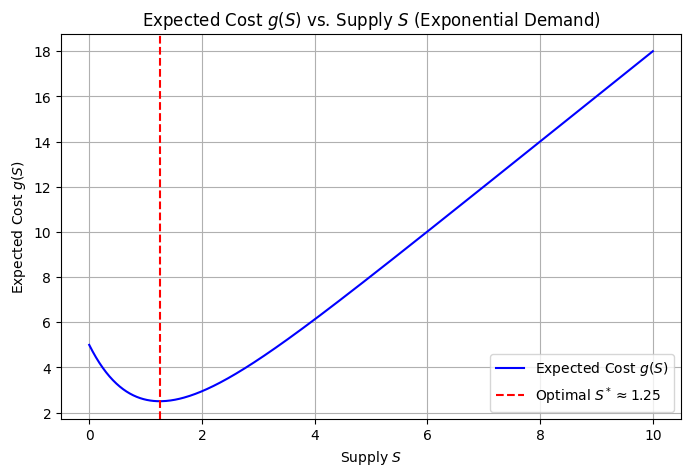

np.float64(1.252763051167479)

In [4]:
result = minimize_scalar(expected_cost, bounds=(0, 10), method='bounded')
optimal_S = result.x

# Simulation of costs
S_values = np.linspace(0, 10, 500)
costs = [expected_cost(S) for S in S_values]

# Plotting the costs against S
plt.figure(figsize=(8, 5))
plt.plot(S_values, costs, label="Expected Cost $g(S)$", color='blue')
plt.axvline(optimal_S, color='red', linestyle='--', label=f"Optimal $S^* \\approx {optimal_S:.2f}$")
plt.xlabel("Supply $S$")
plt.ylabel("Expected Cost $g(S)$")
plt.title("Expected Cost $g(S)$ vs. Supply $S$ (Exponential Demand)")
plt.legend()
plt.grid(True)
plt.show()

optimal_S

## Question 2: Optimal Bank Cash Management with Risky Investments and Penalties (Led By: Corentin)

Assume you are the owner of a bank where customers come in randomly every day to make cash deposits and to withdraw cash from their accounts. At the end of each day, you can borrow (from another bank, without transaction costs) any cash amount $y > 0$ at a constant daily interest rate $R$, meaning you will need to pay back a cash amount of $y(1 + R)$ at the end of the next day. Also, at the end of each day, you can invest a portion of your bank’s cash in a risky (high return, high risk) asset. Assume you can change the amount of your investment in the risky asset each day, with no transaction costs (this is your mechanism to turn any amount of cash into risky investment or vice-versa).

A key point here is that once you make a decision to invest a portion of your cash in the risky asset at the end of a day, you will not have access to this invested amount as cash that otherwise could have been made available to customers who come in the next day for withdrawals. More importantly, if the cash amount $c$ in your bank at the start of a day is less than $C$, the banking regulator will make you pay a penalty of $K \cdot \cot\left( \frac{\pi c}{2C} \right)$ (for a given constant $K > 0$).

For convenience, we make the following assumptions:
- Assume that the borrowing and investing is constrained so that we end the day (after borrowing and investing) with positive cash ($c > 0$) and that any amount of regulator penalty can be immediately paid (meaning $c \geq K \cdot \cot\left( \frac{\pi c}{2C} \right)$ when $c \leq C$).
- Assume that the deposit rate customers earn is so small that it can be ignored.
- Assume for convenience that the first half of the day is reserved for only depositing money and the second half of the day is reserved for only withdrawal requests.
- Assume that if you do not have sufficient cash to fulfill a customer withdrawal request, you ask the customer to make the withdrawal request again the next day.
- Assume all quantities are continuous variables.

---

### Part (A): MDP Modeling

Model the bank’s problem as a **Markov Decision Process (MDP)** with the goal of maximizing the **Expected Utility of assets less liabilities** at the end of a $T$-day horizon, conditional on any current situation of assets and liabilities.

1. **State Space**: Define the possible states of the system.
2. **Action Space**: Specify the possible actions available to the bank at each state.
3. **Transition Function**: Describe how the state evolves based on the current state and the chosen action.
4. **Reward Function**: Specify the reward structure that incentivizes optimal behavior.

*Note*: Be very careful with your notation; ensure that every subscript, index, superscript, prime, etc. is properly defined and necessary. There are a lot of variables at play, so everything must be properly defined or points will be deducted.

---

### Part (B): Reinforcement Learning Approach

In a practical setting, we do not know the exact probability distributions of the customer deposits and withdrawals. Neither do we know the exact stochastic process of the risky asset. But assume we have access to a large set of historical data detailing daily customer deposits and withdrawal requests, as well as daily historical market valuations of the risky asset. Assume we also have data on new customers as well as leaving customers (sometimes due to their withdrawal requests not being satisfied promptly).

Describe your approach to solving this problem with **Reinforcement Learning** by using the historical data described above.

1. Specify which **Reinforcement Learning algorithm** you would use, including any customizations for this problem.
2. Provide sufficient detail that will enable a programmer with knowledge of RL to implement your ideas.

*Note*: You are not expected to write any code for this part.

### Part (A) Answer

<span style="color:red">*fill in*</span>

### Part (B) Answer

<span style="color:red">*fill in*</span>

## Question 3: Career Optimization (Led By: Rany)

Imagine you live in a world where every job is an hourly-wage job. You have $H$ available hours in a day (for some fixed $H \in \mathbb{Z}^+$), and each morning when you leave your house, you can decide to split those $H$ hours into:

- Hours spent on learning to get better at your current job (call it $l \in \mathbb{Z}_{\geq 0}$),
- Hours spent on searching for another job (call it $s \in \mathbb{Z}_{\geq 0}$), and
- Remaining $H - l - s$ hours spent on actually working on your current job.

If your job currently pays you at an hourly-wage of $w$ dollars, then at the end of that day, you will be given a cash amount of $w \cdot (H - l - s)$ dollars. We assume that any hourly-wage $w$ in our world is an integer in the finite set $\{1, 2, \dots, W\}$ for some fixed $W \in \mathbb{Z}^+$.

Each employer has a wage model such that if you spend $l$ hours on learning on a given day where your hourly-wage was $w$, then the employer sends you an email the next morning with that new day’s hourly-wage of:  
$$\min(w + x, W)$$  
where $x$ is a Poisson random variable with mean $\alpha \cdot l$ for some fixed $\alpha \in \mathbb{R}^+$.

Each morning, with probability $\frac{\beta s}{H}$ for some fixed $\beta \in [0, 1]$, you will receive an email from another employer with a job-offer with hourly-wage of  
$$\min(w + 1, W)$$  
where $w$ was the hourly wage of the job you were on the previous day and $s$ is the number of hours you spent on job-search the previous day.

You read all your emails before you leave your house in the morning. If another job is offered to you and if the hourly-wage of that job is greater than your current employer’s hourly-wage stated in that morning’s email, then you accept the other job. Otherwise, you continue in your current job. Whichever job you decide to do, each morning when you leave your house, you decide how to split the $H$ hours of that day into learning hours, job-searching hours, and working hours.

Your goal is to maximize the **Expected (Discounted) Wages** earned over an infinite horizon (assume you never age and will live infinitely). The daily discount factor is a fixed $0 < \gamma < 1$.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the states, actions, rewards, state-transition probabilities, and discount factor. Be very precise with your notation!!

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (C): Solving for the Optimal Policy

Solve for the **Optimal Value Function** and **Optimal Policy** using **Value Iteration**. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `rl/dynamic_programming.py`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (D): Visualization

Plot a graph of the **Optimal Policy** (or print the optimal policy) for the following configuration:  
$H = 10$, $W = 30$, $\alpha = 0.08$, $\beta = 0.82$, $\gamma = 0.95$.  

Provide an intuitive explanation for this optimal policy.


### Part (A) Answer

<span style="color:red">

*States*: 
Since we are modeling an MDP, we want the states to be Markovian, which means that we want them to encapsulate all teh information we need to make a future decision. 

Therefore, what we need here is the current hourly wage. 

We can define the state space by 

$$
S = {w \in \mathbb{Z} :1 \le w \le W}.
$$

---
*Actions*: 
Here, our actions are going to consist of our decision of allocation of our available hours that we have on that respective day ($H$). 

We have these from the problem statement. 

$l \in \mathbb{Z}_{\ge 0}$ represents the hours spent learning. 

$s \in \mathbb{Z}_{\ge 0}$ represents the hours spent looking for a job. 

$H-l-s \in \mathbb{Z}_{\ge 0}$ represents the hours spent on actually working our job. 

Therefore, our action state is going to consist of 
$$
A = {(l, s) \in \mathbb{Z}_{\ge 0}^2 \mid l + s \le H}. 
$$
---
*Rewards*: 
Our daily reward consists of 

$$
r(w, l, s) = w, (H-l-s)
$$

It consists of a function of $(l, s)$, where we work $H - l - s$ hours at wage $w$.

---

*State-transition probabilities*: 

The state transitions occur overnight, following two mechanisms:

First, we focus on the updated salary given by our employer given that we learned for $l$ hours the prior day. We can call this "promotion". 

If $l$ hours are spent on learning, then the employer sends an email with an updated wage given by
$$
w_{\text{emp}} = \min\bigl(w + X,\, W\bigr),
$$
where $X$ is a Poisson random variable with mean $\alpha\,l$. In other words, if
$$
\Pr(X=x) = p_x = e^{-\alpha l}\frac{(\alpha l)^x}{x!},\quad x = 0,1,2,\dots,
$$
then without any other events, the new wage would be $w_{\text{emp}}$.

For the job search offer, we have that if we spend $s$ hours on job search, then with probability
   $$
   \frac{\beta s}{H},
   $$
   we receive an offer from another employer who offers a wage
   $$
   w_{\text{offer}} = \min(w+1,\,W).
   $$
   Decision rule: On the morning of the next day, we read all emails and compare $w_{\text{offer}}$ to $w_{\text{emp}}$. The switch to the new job happens if and only if
   $$
   w_{\text{offer}} > w_{\text{emp}},
   $$
   and otherwise we remain with the current employer’s updated wage.

Thus, given state $w$ and action $(l,s)$, we define the probability of a job offer as
$$
q = \frac{\beta s}{H}.
$$
Then the transition is as follows:

- **(a) When no job offer arrives ($1-q$):**  
  The new state is
  $$
  w' = \min\bigl(w+X,\,W\bigr).
  $$
  That is,
  $$
  \Pr(w' \mid w, (l,s)) = (1-q) \sum_{x:\min(w+x,W)=w'} p_x.
  $$

- **(b) When a job offer arrives ($q$):**  
  The outcome depends on the realization of $X$:
  - If $x=0$ (so $w_{\text{emp}} = w$) then, since
    $$
    w_{\text{offer}} = \min(w+1,W) > w,
    $$
    we switch to the offered job; hence, $w' = \min(w+1,W)$.
  - If $x \ge 1$, then note:
    - For $w < W$: if $x=1$ then $w_{\text{emp}} = \min(w+1,W) = w_{\text{offer}}$ (so we do **not** switch, since the offer is not strictly greater), and if $x\ge2$ then $w_{\text{emp}} \ge w+2 > w_{\text{offer}}$ so we also remain.
    - For $w = W$: both $w_{\text{emp}} = W$ and $w_{\text{offer}} = W$ so we remain in state $W$.
  
  Therefore we have here that for $x=0$, the new state is $w' = \min(w+1,W)$. Otherwise, for $x\ge1$: new state is $w' = \min(w+x,W)$.

Thus, for $w < W$ the full transition probabilities are:
- **For $x=0$:**
  $$
  \Pr(w' = w \mid w, (l,s)) = (1-q)p_0,\quad \Pr(w' = \min(w+1,W) \mid w, (l,s)) = q\, p_0.
  $$
- **For $x\ge 1$:** if $w+x < W$ then
  $$
  \Pr(w' = w+x \mid w, (l,s)) = p_x,
  $$
  and if $w+x \ge W$ then
  $$
  \Pr(w' = W \mid w, (l,s)) = \sum_{x:\,w+x\ge W} p_x.
  $$
  
For the boundary state $w = W$ the process is degenerate: regardless of $l$ or $s$,
$$
\Pr(W \mid W, (l,s)) = 1.
$$




*Discount factor*:

The discount factor $gamma \in [0, 1]$. We could say that gamma has to be strictly less than $1$ so that the rewards converge at some point, otherwise we would get infinite rewards.


</span>

### Part (B) Answer

In [ ]:
# fill in with Python code
import math
from itertools import product

class HourlyWageMDP:
    def __init__(self, H, W, alpha, beta, gamma):
        """
        Initialize the MDP.
        Parameters:
          H     : Total available hours per day (integer).
          W     : Maximum possible hourly wage (integer).
          alpha : Learning rate parameter (float > 0).
          beta  : Job-search effectiveness parameter in [0, 1].
          gamma : Daily discount factor (float in (0, 1)).
        """
        self.H = H
        self.W = W
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        # The state, as we mentioned previously in part A, is the current wage, an integer from 1 to W.
        self.states = list(range(1, W+1))
        # Actions are the pairs (l, s), again, as mentioned in part A, where l and s are nonnegative integers with l+s <= H.
        self.actions = [(l, s) for l in range(H+1) for s in range(H+1 - l)]
    
    def reward(self, w, action):
        """
        Immediate reward when in state w and taking action (l, s).
        work for H - l - s hours at wage w.
        """
        l, s = action
        working_hours = self.H - l - s
        return w * working_hours

    def poisson_prob(self, lam, x):
        """
        Compute the Poisson probability P(X=x) for a Poisson random variable
        with mean lam.
        """
        return math.exp(-lam) * (lam ** x) / math.factorial(x)
    
    def transition_probabilities(self, w, action):
        """
        Given current wage state w and action (l, s), return a dictionary
        mapping each possible next state to its probability.
        
        Dynamics:
          - With l hours learning, the employer’s update is:
              w_emp = min(w + X, W)
            where X ~ Poisson(α · l).
          - With s hours job search, receive a job-offer with probability
              q = (β * s) / H,
            offering wage w_offer = min(w + 1, W).
          - On the next day, if a job-offer is received and w_offer > w_emp,
             take the offer; otherwise, keep w_emp.
          
          Note: For x = 0 (i.e. X=0), w_emp = w. Thus,
            - if no offer (probability 1 - q), next wage remains w,
            - if an offer (probability q), next wage becomes min(w+1, W).
          For x ≥ 1, the learning update gives w_emp = min(w + x, W), which
          is always at least as high as w_offer.
        """
        l, s = action
        # At maximum wage, state is absorbing.
        if w == self.W:
            return {self.W: 1.0}
        
        q = (self.beta * s) / self.H  # probability of receiving a job offer
        lam = self.alpha * l          # mean for the Poisson random variable
        
        trans = {}
        
        # Special case: if no learning is done (l == 0 => lam == 0),
        # then X=0 with probability 1.
        if lam == 0:
            # Without job offer, wage remains w.
            # With job offer, wage becomes min(w+1, W).
            no_offer_state = w
            offer_state = min(w + 1, self.W)
            trans[no_offer_state] = 1 - q
            trans[offer_state] = q
            return trans
        
        # here, we consider the outcome when X = 0.
        p0 = self.poisson_prob(lam, 0)
        # if no job offer arrives, then the wage remains w.
        trans[w] = trans.get(w, 0) + (1 - q) * p0
        # if a job offer arrives, then wage becomes min(w+1, W)
        new_wage_offer = min(w + 1, self.W)
        trans[new_wage_offer] = trans.get(new_wage_offer, 0) + q * p0
        
        # for outcomes when X >= 1.
        x = 1
        # now, wee sum over x until the probability becomes negligibly small.
        while True:
            p_x = self.poisson_prob(lam, x)
            # here, we use a cutoff to stop summing (adjust tolerance as needed)
            if p_x < 1e-8 and x > lam + 10:
                break
            # now, for x >= 1, the learning update gives wage = min(w+x, W)
            next_wage = w + x
            if next_wage > self.W:
                next_wage = self.W
            # we can note here that regardless of whether a job offer is received,
            # if X >= 1 no switch (either because the learning
            # update is equal or superior to the offer).
            trans[next_wage] = trans.get(next_wage, 0) + p_x
            x += 1
        
        return trans

    def get_actions(self, w):
        """
        Returns the list of feasible actions from state w.
        In this problem the set of actions does not depend on w.
        """
        return self.actions

    def one_step_lookahead(self, w, V):
        """
        Given a state w and a value function V (a dictionary mapping states to values),
        return a dictionary mapping each action to its Q-value, i.e.,
          Q(w, (l,s)) = r(w,(l,s)) + gamma * sum_{w'} P(w'|w,(l,s)) V(w').
        This can be used in policy evaluation/improvement.
        """
        action_values = {}
        for action in self.actions:
            r_val = self.reward(w, action)
            trans_probs = self.transition_probabilities(w, action)
            exp_value = sum(prob * V[next_state] for next_state, prob in trans_probs.items())
            action_values[action] = r_val + self.gamma * exp_value
        return action_values

if __name__ == "__main__":
    # now, we set MDP parameters:
    H = 10         # total hours available per day
    W = 30        # maximum wage level
    alpha = 0.08   # learning parameter
    beta = 0.82    # job search parameter
    gamma = 0.95  # discount factor

    mdp = HourlyWageMDP(H, W, alpha, beta, gamma)
    
    # here, we list available actions from a state
    print("Available actions (l, s):")
    for action in mdp.get_actions(1):
        print(action, end=" ")
    print("\n")
    
    state = 5
    action = (2, 1)  # here the example consists of spending 2 hours learning and 1 hour on job search
    trans_probs = mdp.transition_probabilities(state, action)
    
    print(f"Transition probabilities from state {state} with action {action}:")
    for next_state, prob in sorted(trans_probs.items()):
        print(f"  Next state {next_state}: probability {prob:.4f}")


Available actions (l, s):
(0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (0, 5) (0, 6) (0, 7) (0, 8) (0, 9) (0, 10) (1, 0) (1, 1) (1, 2) (1, 3) (1, 4) (1, 5) (1, 6) (1, 7) (1, 8) (1, 9) (2, 0) (2, 1) (2, 2) (2, 3) (2, 4) (2, 5) (2, 6) (2, 7) (2, 8) (3, 0) (3, 1) (3, 2) (3, 3) (3, 4) (3, 5) (3, 6) (3, 7) (4, 0) (4, 1) (4, 2) (4, 3) (4, 4) (4, 5) (4, 6) (5, 0) (5, 1) (5, 2) (5, 3) (5, 4) (5, 5) (6, 0) (6, 1) (6, 2) (6, 3) (6, 4) (7, 0) (7, 1) (7, 2) (7, 3) (8, 0) (8, 1) (8, 2) (9, 0) (9, 1) (10, 0) 

Transition probabilities from state 5 with action (2, 1):
  Next state 5: probability 0.7823
  Next state 6: probability 0.2062
  Next state 7: probability 0.0109
  Next state 8: probability 0.0006
  Next state 9: probability 0.0000
  Next state 10: probability 0.0000
  Next state 11: probability 0.0000
  Next state 12: probability 0.0000
  Next state 13: probability 0.0000
  Next state 14: probability 0.0000
  Next state 15: probability 0.0000


### Part (C) Answer

In [53]:
# fill in with Python code
from itertools import product

def value_iteration(mdp, theta=1e-6, max_iterations=10000):
    """
    Runs value iteration for the given MDP.
    
    Returns:
      V: A dictionary mapping each state to its optimal value.
      policy: A dictionary mapping each state to the optimal action.
    """
    V = {w: 0.0 for w in mdp.states}
    
    for i in range(max_iterations):
        delta = 0
        V_new = {}
        # here, we update each state's value.
        for w in mdp.states:
            action_values = []
            for action in mdp.get_actions(w):
                r_val = mdp.reward(w, action)
                trans_probs = mdp.transition_probabilities(w, action)
                expected_value = sum(prob * V[next_state] for next_state, prob in trans_probs.items())
                action_value = r_val + mdp.gamma * expected_value
                action_values.append(action_value)
            best_value = max(action_values) if action_values else 0
            V_new[w] = best_value
            delta = max(delta, abs(best_value - V[w]))
        V = V_new
        if delta < theta:
            print("Value iteration converged after", i+1, "iterations.")
            break
    else:
        print("Value iteration did not converge after max iterations.")
    
    # now, we extract the optimal policy.
    policy = {}
    for w in mdp.states:
        best_action = None
        best_value = float('-inf')
        for action in mdp.get_actions(w):
            r_val = mdp.reward(w, action)
            trans_probs = mdp.transition_probabilities(w, action)
            expected_value = sum(prob * V[next_state] for next_state, prob in trans_probs.items())
            action_value = r_val + mdp.gamma * expected_value
            if action_value > best_value:
                best_value = action_value
                best_action = action
        policy[w] = best_action
    return V, policy


if __name__ == "__main__":
    H = 10       # Total hours available per day
    W = 30        # Maximum wage level
    alpha = 0.08   # Learning parameter
    beta = 0.82    # Job search parameter
    gamma = 0.95  # Discount factor

    # here, we create the MDP instance.
    mdp = HourlyWageMDP(H, W, alpha, beta, gamma)
    
    # now, we solve for the optimal value function and policy using value iteration.
    V_opt, optimal_policy = value_iteration(mdp, theta=1e-6)
    
    print("\nOptimal Value Function:")
    for w in sorted(V_opt.keys()):
        print(f"  Wage {w}: V = {V_opt[w]:.4f}")
    print("\nOptimal Policy (action as (l, s)):")
    for w in sorted(optimal_policy.keys()):
        print(f"  Wage {w}: take action {optimal_policy[w]}")


Value iteration converged after 382 iterations.

Optimal Value Function:
  Wage 1: V = 1259.6505
  Wage 2: V = 1340.4151
  Wage 3: V = 1426.3580
  Wage 4: V = 1517.8112
  Wage 5: V = 1615.1282
  Wage 6: V = 1718.6847
  Wage 7: V = 1828.8810
  Wage 8: V = 1946.1426
  Wage 9: V = 2070.9227
  Wage 10: V = 2203.7033
  Wage 11: V = 2344.9975
  Wage 12: V = 2495.3514
  Wage 13: V = 2655.3257
  Wage 14: V = 2825.6335
  Wage 15: V = 3006.9964
  Wage 16: V = 3200.0000
  Wage 17: V = 3400.0000
  Wage 18: V = 3600.0000
  Wage 19: V = 3800.0000
  Wage 20: V = 4000.0000
  Wage 21: V = 4200.0000
  Wage 22: V = 4400.0000
  Wage 23: V = 4600.0000
  Wage 24: V = 4800.0000
  Wage 25: V = 5000.0000
  Wage 26: V = 5200.0000
  Wage 27: V = 5400.0000
  Wage 28: V = 5600.0000
  Wage 29: V = 5800.0000
  Wage 30: V = 6000.0000

Optimal Policy (action as (l, s)):
  Wage 1: take action (10, 0)
  Wage 2: take action (10, 0)
  Wage 3: take action (10, 0)
  Wage 4: take action (10, 0)
  Wage 5: take action (10, 0)


### Part (D) Answer

Value iteration converged after 382 iterations.
Optimal Policy (for each wage, action is given as (l, s)):
  Wage  1: optimal action (l, s) = (10, 0)
  Wage  2: optimal action (l, s) = (10, 0)
  Wage  3: optimal action (l, s) = (10, 0)
  Wage  4: optimal action (l, s) = (10, 0)
  Wage  5: optimal action (l, s) = (10, 0)
  Wage  6: optimal action (l, s) = (10, 0)
  Wage  7: optimal action (l, s) = (10, 0)
  Wage  8: optimal action (l, s) = (10, 0)
  Wage  9: optimal action (l, s) = (10, 0)
  Wage 10: optimal action (l, s) = (10, 0)
  Wage 11: optimal action (l, s) = (10, 0)
  Wage 12: optimal action (l, s) = (10, 0)
  Wage 13: optimal action (l, s) = (10, 0)
  Wage 14: optimal action (l, s) = (0, 10)
  Wage 15: optimal action (l, s) = (0, 10)
  Wage 16: optimal action (l, s) = (0, 0)
  Wage 17: optimal action (l, s) = (0, 0)
  Wage 18: optimal action (l, s) = (0, 0)
  Wage 19: optimal action (l, s) = (0, 0)
  Wage 20: optimal action (l, s) = (0, 0)
  Wage 21: optimal action (l, s) = (0,

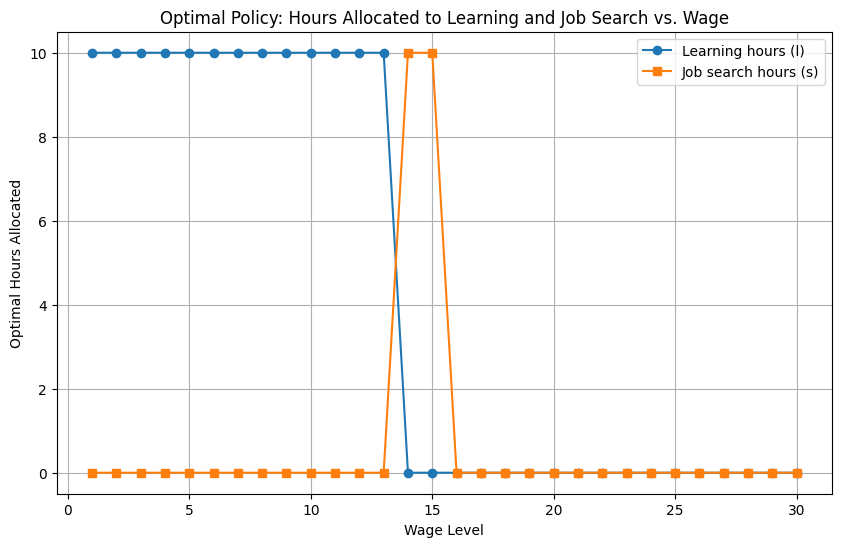

In [54]:
# fill in with Python code
import matplotlib.pyplot as plt


H = 10
W = 30
alpha = 0.08
beta = 0.82
gamma = 0.95
mdp = HourlyWageMDP(H, W, alpha, beta, gamma)
V_opt, optimal_policy = value_iteration(mdp, theta=1e-6)
print("Optimal Policy (for each wage, action is given as (l, s)):")
for w in sorted(optimal_policy.keys()):
    print(f"  Wage {w:2d}: optimal action (l, s) = {optimal_policy[w]}")
wages = sorted(optimal_policy.keys())
l_values = [optimal_policy[w][0] for w in wages]
s_values = [optimal_policy[w][1] for w in wages]

plt.figure(figsize=(10,6))
plt.plot(wages, l_values, label='Learning hours (l)', marker='o')
plt.plot(wages, s_values, label='Job search hours (s)', marker='s')
plt.xlabel("Wage Level")
plt.ylabel("Optimal Hours Allocated")
plt.title("Optimal Policy: Hours Allocated to Learning and Job Search vs. Wage")
plt.legend()
plt.grid(True)
plt.show()


We can see here that the results are interesting. 

It shows that when the salary is low, spending time accumulating knowldege (learning), for future reward is the most profitable way to go. Then, in the mid range or the "career", we see that it is favorable to start looking for a job, to then finally settle with a job that gives us salary that is close to the max possible salary. 

This is interesting because it is very similar to real life scenarios, where we spend our first years going to school and university, learning, to then find a job, change jobs every 3-5 years, to finally settle with out long-term role.

## Question 4: Car Sales (Led By: Corentin)

Imagine you own a car which you need to sell within a finite window of $N$ days. At the beginning of each day, you receive an offer from a dealership which is randomly distributed over the interval $[m, M]$, $0 < m < M$, with a known continuous distribution $Q$ on this support; the offers each day are i.i.d. After receiving an offer, you have to decide immediately whether to accept or reject it. If you reject the offer, it is lost, and you have to pay a parking cost for the car of $c \geq 0$, which you must pay at the end of each day you do not sell the car. After $N$ days, the car has to be sold. The parameters $m$, $M$, and $c$ are all fixed positive real numbers. Your objective is to maximize the sale proceeds.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this problem fully as an **MDP** by specifying the following:
1. **States**: Define the state space
2. **Actions**: Specify the possible actions available to the seller
3. **Rewards**: Define the reward structure
4. **State-Transition Probabilities**: Specify the transition dynamics
5. **Discount Factor**: Indicate the discount factor

Additionally, discuss what particular kind of MDP this is.

---

### Part (B): Analytical Solution

Solve this MDP analytically for the **optimal policy**. Provide a detailed explanation of the steps used to derive the policy and any key conditions or assumptions required (*Note*: this is to be done mathematically, not using code).

---

### Part (C): Special Case Analysis

Consider the case where $c = 0$ and $Q(x) = U_{[m, M]}(x)$ (the uniform distribution on $[m, M]$). Solve for as closed-form a solution of the optimal policy **as possible**. To make this concrete, the functional form of your optimal policy should be explicitly defined but can depend on coefficients that are recursively defined. **You should not have integrals in your solution.**


### Part (A) Answer

<span style="color:red">

$\textbf{1 - States}$\
We define this MDP with $N+1$ states, one terminal state $S$ corresponding when the car is sold and states with the number of remaining days and the offer made by the buyer. Finally, we have 
$$\mathcal{S} = \{(t,P_t)|1\leq t\leq N, P_t\in[m,M]\}\cup \{S\}$$

$\textbf{2 - Actions}$\
By definition of a terminal state there is no action possible when $s = S$, and for $(N,P_N)$ there is only one action "Accept". For the remaining states, there are two actions : "Accept"(A) and "Reject"(R)

$\textbf{3 - Rewards}$\
We have 
$$
    \mathcal{R}(A,(t,P_t)) = P_t\\
    \mathcal{R}(R,(t,P_t)) = -c
$$

$\textbf{4 - State-Transition probability}$\
Finally, we also need to determine $\mathcal{P}(s,a,s')=\mathbb{P}(S_{t+1} = s'|A_t = a,S_t = s)$. We have 

$$
    \mathcal{P}(S,A,(t,P_t)) = 1\\
    \mathcal{P}((t+1,P_{t+1}),R,(t,P_t)) = Q(P_{t+1})

$$

$\textbf{5 - Discount factor}$\
We would like $G_t$ to be the final amout of money we earn at the end. Hence, according to the previous definition we need to have $G_t = R_{t+1}+R_{t+2}+...$, and the discount factor is $\gamma = 1$. Moreover, we can see this MDP is a finite-horizon optimal stopping problem.



</span>

### Part (B) Answer

<span style="color:red">


We want to use the Bellman equation for finite-horizon problem, we set by definition $V_t(P_t) = V^*((t,P_t))$. Moreover, we also have $V^*(S) = 0$ by definition of a terminal state. Hence, we can calculate $V_t$ by induction and
\begin{align*}
    V_t(P_t) &= \max_{a\in\mathcal{A}}\left(\mathcal{R}(a,(t,P_t))+\int_m^M\mathcal{P}((t+1,P_{t+1}),a,(t,P_t))V_{t+1}(P_{t+1})dP_{t+1}\right)\\
    &= \max\left(P_t,-c+\int_m^M Q(P_{t+1})V_{t+1}(P_{t+1})dP_{t+1}\right)\\
    &= \max\left(P_t,-c+\mathbb{E}_{P_{t+1}\sim Q}(V_{t+1}(P_{t+1}))\right)
\end{align*}

With the terminal condition $V_T(P_T)=P_T$. With this rule, we can calculate $\forall t\leq T, V_t(P_t)$ and deduce the optimal policy.

</span>

### Part (C) Answer

<span style="color:red">

According to the previous question we have $V_t(P_t)=\max(P_t,\mathbb{E}_{P_{t+1}\sim \mathcal{U[m,M]}}(V_{t+1}(P_{t+1})))$ with $V_T(P_T) = P_T$. To compute this induction explicitly, we need to calculate first 
\begin{align*}
    \forall \alpha \in[m,M], \mathbb{E}_{X\sim\mathcal{U}[m,M]}(\max(X,\alpha))&= \frac{1}{M-m}\int_m^M \max(x,\alpha)dx\\
    &=\frac{1}{M-m}\int_m^\alpha \alpha dx+\frac{1}{M-m}\int_\alpha^M xdx\\
    &= \frac{\alpha(\alpha-m)}{M-m}+\frac{M^2-\alpha^2}{2(M-m)}\\
    &= \frac{M^2+\alpha^2-2m\alpha}{2(M-m)}
\end{align*}
Based on this calculation, we set 
$$

    \alpha_{n+1} = \frac{M^2+\alpha_n^2-2m\alpha_n}{2(M-m)}\\
    \alpha _0 = m

$$
And we have by induction 
\begin{align*}
    \mathbb{E}(V_t(P_t)) &= \mathbb{E}\left(\max(P_t,\mathbb{E}(V_{t+1}(P_{t+1})))\right)\\
    &= \mathbb{E}\left(\max(P_t,\alpha_{T-t})\right)\\
    &= \alpha_{T-t+1}
\end{align*}
Hence, we finally compute that $V_t(P_t) = \max(P_t,\alpha_{T-t})$


</span>

## Question 5: Constrained Consumption (Led By: Corentin)

Consider the following discrete-time MDP for constrained consumption. At $t = 0$, the agent is given a finite amount $x_0 \in \mathbb{R}^+$ of a resource. In each time period, the agent can choose to consume any amount of the resource, with the consumption denoted as $c \in [0, x]$ where $x$ is the amount of the resource remaining at the start of the time period. This consumption results in a reduction of the resource at the start of the next time period:  
$$x' = x - c.$$  

Consuming a quantity $c$ of the resource provides a utility of consumption equal to $U(c)$, and we adopt the **CRRA utility function**:  
$$
U(c) = \frac{c^{1 - \gamma}}{1 - \gamma}, \quad (\gamma > 0, \gamma \neq 1)
$$

Our goal is to maximize the aggregate discounted utility of consumption until the resource is completely consumed. We assume a discount factor of $\beta \in [0, 1]$ when discounting the utility of consumption over any single time period.

We model this as a **discrete-time, continuous-state-space, continuous-action-space, stationary, deterministic MDP**, and so our goal is to solve for the **Optimal Value Function** and associated **Optimal Policy**, which will give us the optimal consumption trajectory of the resource. Since this is a stationary MDP, the **State** is simply the amount $x$ of the resource remaining at the start of a time period. The **Action** is the consumption quantity $c$ in that time period. The **Reward** for a time period is $U(c)$ when the consumption in that time period is $c$. The discount factor over each single time period is $\beta$.

We assume that the **Optimal Policy** is given by:  
$$
c^* = \theta^* \cdot x \quad \text{for some } \theta^* \in [0, 1].
$$

---

### Part (A): Closed-form Expression for $V_\theta(x)$

Our first step is to consider a fixed deterministic policy, given by:  
$$c = \theta \cdot x \quad \text{for some fixed } \theta \in [0, 1].$$  
Derive a closed-form expression for the **Value Function** $V_\theta(x)$ for a fixed deterministic policy, given by $c = \theta \cdot x$. Specifically, you need to express $V_\theta(x)$ in terms of $\beta$, $\gamma$, $\theta$, and $x$.

---

### Part (B): Solving for $\theta^*$

Use this closed-form expression for $V_\theta(x)$ to solve for the $\theta^*$ which maximizes $V_\theta(x)$ (thus fetching us the **Optimal Policy** given by $c^* = \theta^* \cdot x$).

---

### Part (C): Expression for $V^*(x)$

Use this expression for $\theta^*$ to obtain an expression for the **Optimal Value Function** $V^*(x)$ in terms of only $\beta$, $\gamma$, and $x$.

---

### Part (D): Validation of the Bellman Equation

Validate that the **Optimal Policy** (derived in part B) and **Optimal Value Function** (derived in part C) satisfy the **Bellman Optimality Equation**.

### Part (A) Answer

<span style="color:red">

The MDP can be represented by the states $\mathcal{S} = [0,x_0]$ and the actions $\mathcal{A} = [0,x]$. Hence, with a fixed policy we can crite the Bellman equation and we have 
$$V_{\theta}(x) = \mathcal{R}(x,c_{\theta})+\beta\int_0^{x_0}\mathcal{P}(x',c_{\theta},x)V_{\theta}(x')dx' = U(\theta x)+\beta V((1-\theta)x)$$
Hence, by induction we can calculat that 
\begin{align*}
    V_{\theta}(x) &= U(\theta x)+\beta U(\theta(1-\theta)x)+ \beta^2 V_{\theta}((1-\theta)^2x)\\
    &= \displaystyle\sum_{t=0}^{n}\beta^tU(\theta(1-\theta)^tx)+\beta^nV_{\theta}((1-\theta)^nx)\\
    &= \displaystyle\sum_{t=0}^{\infty}\beta^tU(\theta(1-\theta)^tx)\\
    &= \frac{x^{1-\gamma}\theta^{1-\gamma}}{1-\gamma}\displaystyle\sum_{t=0}^\infty \left[\beta(1-\theta)^{1-\gamma}\right]^t\\
    &= \frac{x^{1-\gamma}\theta^{1-\gamma}}{(1-\gamma)\left[1-\beta(1-\theta)^{1-\gamma}\right]}
\end{align*}


</span>

### Part (B) Answer

<span style="color:red">

in order to maximize $V_{\theta}(x) = \frac{x^{1-\gamma}\theta^{1-\gamma}}{(1-\gamma)\left[1-\beta(1-\theta)^{1-\gamma}\right]}$, we need to maximize the function 
$$f:\theta\in[0,1]\mapsto  \frac{\theta^{1-\gamma}}{1-\beta(1-\theta)^{1-\gamma}}$$
The function is differentiable and 
$$f'(\theta) = \frac{(1-\gamma)\theta^{-\gamma}}{\left[1-\beta(1-\theta)^{1-\gamma}\right]^2}\left[1-\beta(1-\theta)^{-\gamma}\right]$$
Finally, using that for $\theta^*$ we have $f'(\theta^*) = 0$ we find $\theta^* = 1-\beta^{1/\gamma}$



</span>

### Part (C) Answer

<span style="color:red">

Using the first and second question we have 
\begin{align*}
    V^*(x) &= \frac{x^{1-\gamma}(\theta^*)^{1-\gamma}}{(1-\gamma)\left[1-\beta(1-\theta^*)^{1-\gamma}\right]} \\
    &= \frac{x^{1-\gamma}(1-\beta^{1/\gamma})^{1-\gamma}}{(1-\gamma)\left[1-\beta(\beta^{1/\gamma})^{1-\gamma}\right]}\\
    &= \frac{x^{1-\gamma}(1-\beta^{1/\gamma})^{1-\gamma}}{(1-\gamma)\left[1-\beta^{1/\gamma}\right]}\\
    &= \frac{x^{1-\gamma}}{(1-\gamma)}(1-\beta^{1/\gamma})^{-\gamma}
\end{align*}


</span>

### Part (D) Answer

<span style="color:red">

The Bellman Optimality Equation for this problem is 
$$V^*(x) = \underset{0\leq c\leq x}{\max}\left(U(c)+\beta V^*(x-c)\right)$$
We want to show that the optimal policy found in question $2$, $c^*(x) = \theta^*x = (1-\beta^{1/\gamma})x$ and the corresponding value function $V^*(x) = \frac{x^{1-\gamma}}{(1-\gamma)}(1-\beta^{1/\gamma})^{-\gamma}$ satisfy the Bellman equation. Indeed, we have 
\begin{align*}
    U(c)+\beta V^*(x-c) &= \frac{c^{1-\gamma}}{1-\gamma}+\beta \frac{(x-c)^{1-\gamma}}{1-\gamma}(1-\beta^{1/\gamma})^{-\gamma}\\
    &= \frac{x^{1-\gamma}}{1-\gamma}\left(\left(\frac{c}{x}\right)^{1-\gamma}+\beta(1-\beta^{1/\gamma})^{-\gamma}\left(1-\frac{c}{x}\right)^{1-\gamma}\right)
\end{align*}
And we need to optimize the function $$\theta \mapsto \theta^{1-\gamma}+\beta(1-\beta^{1/\gamma})^{-\gamma}\left(1-\theta\right)^{1-\gamma}$$
Hence, solving $f'(\theta) = 0$, we found 
\begin{align*}
    \theta ^{-\gamma} -\beta(1-\beta^{1/\gamma})^{-\gamma}\left(1-\theta\right)^{-\gamma} = 0&\iff \theta = \beta^{-1/\gamma}(1-\beta^{1/\gamma})(1-\theta)\\
    & \iff \theta = \frac{\beta^{-1/\gamma}(1-\beta^{1/\gamma})}{\beta^{-1/\gamma}(1-\beta^{1/\gamma})+1}\\
    & \iff \theta = 1-\beta^{1/\gamma} = \theta^*
\end{align*}
Hence, the maximum is obtain for the optimal policy we just described, and we can verify that 
$$V^*(x) = U(\theta^* x)+\beta V(x-\theta^* x) = \frac{x^{1-\gamma}}{(1-\gamma)}(1-\beta^{1/\gamma})^{-\gamma}$$
Hence, the optimal policy and optimal value function verify the Bellman Optimality Equation 


</span>

## Question 6: TD and MC Algorithms (Led By Rany)

In this question, we explore the connection between **Temporal Difference (TD)** and **Monte Carlo (MC)** algorithms.

---

### Part (A): Implementing TD($\lambda$) Prediction Algorithm

Implement the **TD($\lambda$) Prediction algorithm** from scratch in Python code. First, implement it for the **Tabular case**. Next, implement it for the **Function Approximation case**.  

Provide clear and well-commented code for both implementations, and describe any assumptions or simplifications made.

---

### Part (B): Proof of MC Error as Sum of Discounted TD Errors

Prove that the **MC Error** can be written as the sum of discounted TD errors, i.e.,  
$$
G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{u-t} \cdot \big( R_{u+1} + \gamma \cdot V(S_{u+1}) - V(S_u) \big)
$$

Work this out from scratch, rather than relying on general results from class or the textbook.

---

### Part (C): Code Extension

Extend `RandomWalkMRP` (in [rl/chapter10/random_walk_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter10/random_walk_mrp.py)) to `RandomWalkMRP2D` which is a random walk in 2-D with states $\{i, j) | 0 \leq i \leq B_1, 0 \leq j \leq B_2\}$ with terminal states as $(0, j)$ and $(B_1, j)$ for all $j$, $(i, 0)$ and $(i, B_2)$ for all $i$, and with reward of 0 for all $(0, j)$ and for all $(i, 0)$, reward of 1 for all $(B_1, j)$ and for all $(i, B_2)$, and with discrete probabilities of 4 movements - UP, DOWN, LEFT, RIGHT from any non-terminal state. Analyze the convergence of MC and TD on this `RandomWalkMRP2D` much like how we analyzed it for `RandomWalkMRP`, along with plots of similar graphs.

Only modify the code where the message `fill in` is noted.

### Part (A) Answer

In [ ]:
# fill in with Python code
from collections import defaultdict

def td_lambda_tabular(env, num_episodes, gamma, alpha, lambda_):
    """
    Implements TD(λ) prediction for the tabular case.
    
    Args:
      env: The environment with methods reset() and step(action).
      num_episodes: Number of episodes to run.
      gamma: Discount factor.
      alpha: Learning rate.
      lambda_: Trace-decay parameter.
    
    Returns:
      V: A dictionary mapping states to their estimated values.
    """
    # first, we initialize the state-value function arbitrarily. In this case, we chose all zeros. 
    V = defaultdict(float)
    
    for episode in range(num_episodes):
        state = env.reset()  
        eligibility = defaultdict(float)
        done = False
        
        while not done:
            # now, we select action according to the fixed policy (placeholder).
            action = choose_action(state)
            next_state, reward, done, _ = env.step(action)
            
            # then, we compute the TD error: δ = R + γ V(next_state) - V(state) 
            delta = reward + gamma * V[next_state] - V[state]
            
            # now, we intend to increment the eligibility for the current state (accumulating traces).
            eligibility[state] += 1
            
            # for every state, we now update its value estimate and decay its eligibility.
            for s in list(eligibility.keys()):
                V[s] += alpha * delta * eligibility[s]
                eligibility[s] *= gamma * lambda_
            
            state = next_state  # finally, we can move to the next state. 
    
    return V

In [55]:
import numpy as np

def td_lambda_function_approx(env, num_episodes, gamma, alpha, lambda_, feature_func, theta):
    """
    Implements TD(λ) prediction using function approximation (linear approximator).
    
    Args:
      env: The environment with methods reset() and step(action).
      num_episodes: Number of episodes to run.
      gamma: Discount factor.
      alpha: Learning rate.
      lambda_: Trace-decay parameter.
      feature_func: A function that maps a state to its feature vector φ(s).
      theta: Initial parameter vector (numpy array).
    
    Returns:
      theta: The updated parameter vector representing the value function.
    """
    for episode in range(num_episodes):
        state = env.reset()
        # initialize eligibility trace vector to zero (same shape as theta).
        e = np.zeros_like(theta)
        done = False
        
        while not done:
            action = choose_action(state)  # Use a given policy.
            next_state, reward, done, _ = env.step(action)
            
            # ccompute feature representations for current and next states.
            phi_state = feature_func(state)
            phi_next = feature_func(next_state)
            
            # estimate values: V(s) = θ^T φ(s)
            V_state = np.dot(theta, phi_state)
            V_next = np.dot(theta, phi_next)
            
            # compute TD error: δ = R + γ V(next_state) - V(state)
            delta = reward + gamma * V_next - V_state
            
            # we update eligibility trace: e = γ λ e + ∇θ V(s) (and for linear, ∇θ V(s) = φ(s))
            e = gamma * lambda_ * e + phi_state
            
            # finally, we uppdate parameters.
            theta = theta + alpha * delta * e
            
            state = next_state
            
    return theta

def feature_func(state):
    # returns a feature vector for the state.
    # for ex, if state is an integer representing a discrete state,
    num_features = 10 
    phi = np.zeros(num_features)
    index = state % num_features  # dummy example mapping. We could potentially try it out with other mappings.
    phi[index] = 1
    return phi

def choose_action(state):
    return 0


### Part (B) Answer

<span style="color:red">

We wish to show that the Monte Carlo (MC) error, given by  
$$
G_t - V(S_t),
$$  
can be expressed as the sum of discounted Temporal Difference (TD) errors:  
$$
G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{\,u-t} \delta_u,
$$  
where  
$$
\delta_u = R_{u+1} + \gamma\,V(S_{u+1}) - V(S_u)
$$
and the return $G_t$ is defined as:  
$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots + \gamma^{T-t-1} R_T.
$$



   $$
   G_t = R_{t+1} + \gamma G_{t+1}.
   $$
   

   $$
   G_t - V(S_t) = R_{t+1} + \gamma G_{t+1} - V(S_t).
   $$


   $$
   G_t - V(S_t) = \Big( R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \Big) + \gamma \Big( G_{t+1} - V(S_{t+1}) \Big).
   $$
   
   It is interesting here that the term in the first parentheses is the TD error at time $t$, now we get that
   $$
   \delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t).
   $$
   
   So, we can write:
   $$
   G_t - V(S_t) = \delta_t + \gamma \Big( G_{t+1} - V(S_{t+1}) \Big).
   $$



   $$
   G_{t+1} - V(S_{t+1}) = \delta_{t+1} + \gamma \Big( G_{t+2} - V(S_{t+2}) \Big).
   $$
   
  Then, we have that
   $$
   G_t - V(S_t) = \delta_t + \gamma \delta_{t+1} + \gamma^2 \Big( G_{t+2} - V(S_{t+2}) \Big).
   $$



   $$
   G_t - V(S_t) = \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + \cdots + \gamma^{T-t-1} \delta_{T-1}.
   $$
   
   This can be compactly written as:
   
   $$
   G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{\,u-t} \delta_u.
   $$
</span>

### Part (C) Answer

In [56]:
from typing import Tuple, Dict, Mapping
from rl.distribution import Categorical

class RandomWalkMRP2D(FiniteMarkovRewardProcess[Tuple[int, int]]):
    barrier: Tuple[int, int]
    p: Tuple[float, float, float, float]

    def __init__(
        self,
        barrier: Tuple[int, int],
        p: Tuple[float, float, float, float]
    ):
        self.barrier = barrier
        self.p = p
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> Mapping[Tuple[int, int], Categorical[Tuple[Tuple[int, int], float]]]:
        '''
        For each non-terminal state (i, j) where 0 < i < B1 and 0 < j < B2,
        we define four transitions corresponding to UP, DOWN, LEFT, and RIGHT.
        
        A move from state (i,j) results in a next state computed as:
            UP:    (i, j+1)
            DOWN:  (i, j-1)
            LEFT:  (i-1, j)
            RIGHT: (i+1, j)
        
        If the resulting next state is terminal (i.e. either coordinate is 0 or equals the corresponding barrier),
        the reward is defined as follows:
            - If next_state is on the left boundary (i == 0) or bottom boundary (j == 0), then reward = 0.
            - If next_state is on the right boundary (i == B1) or top boundary (j == B2), then reward = 1.
        
        In cases where a corner is reached (i.e. it meets both conditions), the left/bottom condition is applied.
        '''
        d: Dict[Tuple[int, int], Categorical[Tuple[Tuple[int, int], float]]] = {}
        B1, B2 = self.barrier

        # here, we define movements: UP, DOWN, LEFT, RIGHT (this is similar to many DP problems on leetcode, matrix problems, grid problems...)
        directions = [(0, 1), (0, -1), (-1, 0), (1, 0)]
        
        # now, we want to loop over all states in the grid.
        for i in range(B1 + 1):
            for j in range(B2 + 1):
                state = (i, j)
                # here, we skip terminal states (on any boundary)
                if i == 0 or i == B1 or j == 0 or j == B2:
                    continue

                outcomes: Dict[Tuple[Tuple[int, int], float], float] = {}
                for (dx, dy), prob in zip(directions, self.p):
                    next_state = (i + dx, j + dy)
                    
                    # now, we check if next_state is terminal.
                    if (next_state[0] == 0 or next_state[0] == B1 or 
                        next_state[1] == 0 or next_state[1] == B2):
                        # apply reward: 0 for left (i==0) or bottom (j==0);
                        # otherwise (right or top) assign reward 1.
                        if next_state[0] == 0 or next_state[1] == 0:
                            r = 0.0
                        else:
                            r = 1.0
                    else:
                        r = 0.0  # non-terminal transitions yield 0 reward.
                    
                    outcome = (next_state, r)
                    outcomes[outcome] = outcomes.get(outcome, 0.0) + prob
                
                d[state] = Categorical(outcomes)
        
        return d

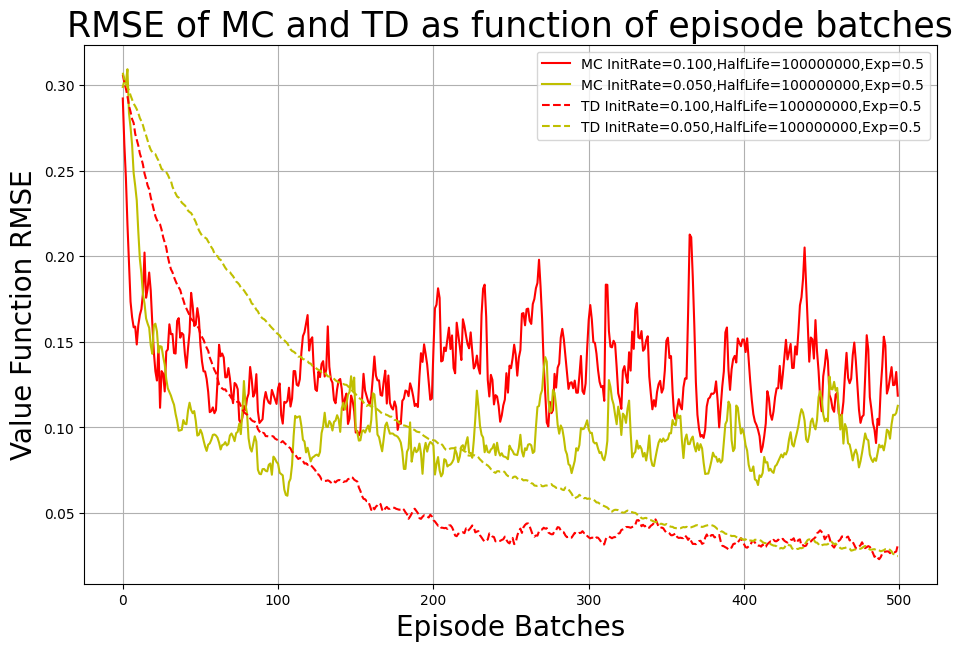

In [57]:
this_barrier: Tuple[int, int] = (10, 10)
this_p: Tuple[float, float, float, float] = (0.2, 0.3, 0.25, 0.25)
random_walk: RandomWalkMRP2D = RandomWalkMRP2D(
    barrier=this_barrier,
    p=this_p
)
compare_td_and_mc(
    fmrp=random_walk,
    gamma=1.0,
    mc_episode_length_tol=1e-6,
    num_episodes=3500,
    learning_rates=[(.1, 1e8, .5), (.05, 1e8, .5)],
    initial_vf_dict={s: 0.5 for s in random_walk.non_terminal_states},
    plot_batch=7,
    plot_start=0
)

## Problem 7: Double Q-Learning (Led By: Rany)

It is known that **Q-Learning** can suffer from a maximization bias during finite-sample training. In this problem, we consider the following modification to the **Tabular Q-Learning** algorithm called **Double Q-Learning**:

---

### **Algorithm 1: Double Q-Learning**

**Initialize** $Q_1(s, a)$ and $Q_2(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** estimate of $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a \big( Q_1(s_t, a) + Q_2(s_t, a) \big)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; **if** with 0.5 probability **then**  
&emsp;&emsp;&emsp; $Q_1(s_t, a_t) \leftarrow Q_1(s_t, a_t) + \alpha \big( r_t + \gamma Q_2(s_{t+1}, \arg \max_a Q_2(s_{t+1}, a)) - Q_1(s_t, a_t) \big)$  

&emsp;&emsp; **else**  
&emsp;&emsp;&emsp; $Q_2(s_t, a_t) \leftarrow Q_2(s_t, a_t) + \alpha \big( r_t + \gamma Q_1(s_{t+1}, \arg \max_a Q_1(s_{t+1}, a)) - Q_2(s_t, a_t) \big)$  

&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** estimate of $Q$

---

### **Algorithm 2: Q-Learning**

**Initialize** $Q(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a Q(s_t, a)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; $Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \big( r_t + \gamma Q(s_{t+1}, \arg \max_a Q(s_{t+1}, a)) - Q(s_t, a_t) \big)$  
&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** $Q$

---

### Instructions:
The code skeleton for this problem is provided below. Implement the following functions: `double_q_learning` and `q_learning`. Once implemented, you can run the code. You will get a graph of the estimated q-value plotted against the episode number. Comment on your observations, and explain the benefits/drawbacks of the double q-learning algorithm for general MDPs.

In [45]:
import random
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from collections import defaultdict
from typing import Mapping, Iterator, TypeVar, Tuple, Dict, Iterable, Generic

# RL imports (adapt or remove if you don't have the same environment):
from rl.distribution import (
    Distribution, Constant, Gaussian, Choose, SampledDistribution, Categorical
)
from rl.markov_process import NonTerminal, State, Terminal
from rl.markov_decision_process import MarkovDecisionProcess
from rl.td import epsilon_greedy_action

S = TypeVar('S')
A = TypeVar('A')

In [46]:
# -----------------------------------------------------------------------
# Tabular Q-value function approximation (done for you)
# -----------------------------------------------------------------------
class TabularQValueFunctionApprox(Generic[S, A]):
    """
    A basic implementation of a tabular function approximation 
    with constant learning rate of 0.1
    Also tracks the number of updates per (state, action).
    """
    def __init__(self):
        self.counts: Mapping[Tuple[NonTerminal[S], A], int] = defaultdict(int)
        self.values: Mapping[Tuple[NonTerminal[S], A], float] = defaultdict(float)
    
    def update(self, k: Tuple[NonTerminal[S], A], target: float) -> None:
        alpha = 0.1
        old_val = self.values[k]
        self.values[k] = (1 - alpha) * old_val + alpha * target
        self.counts[k] += 1
    
    def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
        return self.values[x]

In [47]:
# -----------------------------------------------------------------------
# Double Q-Learning (fill in)
# -----------------------------------------------------------------------
def double_q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Implements Double Q-Learning as described:
      1) We keep two Q-tables, Q1 and Q2.
      2) We choose actions epsilon-greedily with respect to Q1+Q2.
      3) With 50% chance we update Q1 using next-action chosen by max of Q2,
         otherwise update Q2 using next-action chosen by max of Q1.
    """
    Q1 = TabularQValueFunctionApprox[S, A]()
    Q2 = TabularQValueFunctionApprox[S, A]()
    epsilon = 0.1 # we can adjust the epsilon as needed. I remember the professor mentioning that 0.1 is a good value to start with.
    
    while True:
        # Start a new episode by sampling an initial state.
        s = states.sample()  # s is NonTerminal[S]
        
        while isinstance(s, NonTerminal):
            # Now, we get available actions in state s.
            actions = list(mdp.actions(s))
            # Here, we define the combined Q for action selection.
            # (Note: we sum the estimates from Q1 and Q2.)
            def combined_q(sa: Tuple[NonTerminal[S], A]) -> float:
                return Q1(sa) + Q2(sa)
            
            a = epsilon_greedy_action(combined_q, s, actions, epsilon)
            
            # Here, we take action a, observe reward and next state.
            outcome = mdp.step(s, a).sample()
            s_next, r = outcome
            
            if isinstance(s_next, Terminal):
                # If next state is terminal, there are no further actions.
                target_for_update = r
            else:
                next_actions = list(mdp.actions(s_next))
                if len(next_actions) == 0:
                    target_for_update = r
                else:
                    # We prepare targets for both Q1 and Q2 updates.
                    # For Q1: we use Q2's estimates to select the best next action.
                    a_star_for_Q2 = max(next_actions, key=lambda act: Q2((s_next, act)))
                    target_for_Q1 = r + gamma * Q2((s_next, a_star_for_Q2))
                    
                    # For Q2: we use Q1's estimates to select the best next action.
                    a_star_for_Q1 = max(next_actions, key=lambda act: Q1((s_next, act)))
                    target_for_Q2 = r + gamma * Q1((s_next, a_star_for_Q1))
            
            # With 50% probability we update Q1; otherwise we update Q2.
            if random.random() < 0.5:
                # If it is terminal, the target_for_Q1 is just r.
                if isinstance(s_next, Terminal):
                    Q1.update((s, a), r)
                else:
                    Q1.update((s, a), target_for_Q1)
            else:
                if isinstance(s_next, Terminal):
                    Q2.update((s, a), r)
                else:
                    Q2.update((s, a), target_for_Q2)
            
            s = s_next
        
        yield lambda key: Q1(key) + Q2(key)

In [48]:
# -----------------------------------------------------------------------
# Standard Q-Learning (fill in)
# -----------------------------------------------------------------------
def q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Standard Q-Learning:
      1) Keep one Q table
      2) Epsilon-greedy wrt that table
      3) Update Q((s,a)) with  r + gamma * max_{a'} Q((s_next, a'))
    """
    Q = TabularQValueFunctionApprox[S, A]()
    epsilon = 0.1  # Similar to before, if my memory serves me right, 0.1 is a good starting value.
    
    while True:
        # Here, we start a new episode by sampling an initial state.
        s = states.sample()
        
        while isinstance(s, NonTerminal):
            actions = list(mdp.actions(s))
            a = epsilon_greedy_action(Q, s, actions, epsilon)
            
            outcome = mdp.step(s, a).sample()
            s_next, r = outcome
            
            if isinstance(s_next, Terminal):
                target = r
            else:
                next_actions = list(mdp.actions(s_next))
                if len(next_actions) == 0:
                    target = r
                else:
                    a_star = max(next_actions, key=lambda act: Q((s_next, act)))
                    target = r + gamma * Q((s_next, a_star))
            
            Q.update((s, a), target)
            s = s_next
        
        yield Q

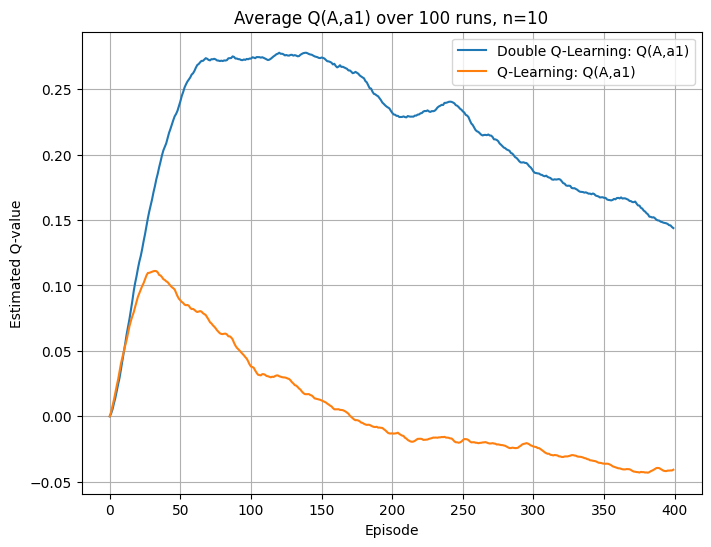

In [49]:
# -----------------------------------------------------------------------
# The MDP: States A,B and actions a1,a2,b1,...,bn (don't modify anything anymore, just run to get the graphs)
# -----------------------------------------------------------------------
@dataclass(frozen=True)
class P1State:
    """
    The MDP state, storing whether we are in "A" or "B".
    """
    name: str

class P1MDP(MarkovDecisionProcess[P1State, str]):
    
    def __init__(self, n: int):
        self.n = n

    def actions(self, state: NonTerminal[P1State]) -> Iterable[str]:
        """
        Return the actions available from this state.
          - if state is A => ["a1", "a2"]
          - if state is B => ["b1", ..., "bn"]
        """
        if state.state.name == "A":
            return ["a1", "a2"]
        else:
            return [f"b{i}" for i in range(1, self.n+1)]
    
    def step(
        self,
        state: NonTerminal[P1State],
        action: str
    ) -> Distribution[Tuple[State[P1State], float]]:
        """
        Return the distribution of (next state, reward) from (state, action):
          - A + a1 => reward 0, next state B
          - A + a2 => reward 0, next state terminal
          - B + b_i => reward ~ Normal(-0.1,1), next state terminal
        """
        if state.state.name == "A":
            if action == "a1":
                return Constant((NonTerminal(P1State("B")), 0.0))
            else:
                return Constant((Terminal(P1State("T")), 0.0))
        else:
            # For B + b_i => reward ~ N(-0.1,1), then terminal
            def sampler():
                r = np.random.normal(loc=-0.1, scale=1.0)
                return (Terminal(P1State("T")), r)
            return SampledDistribution(sampler)

def run_double_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Runs one 'chain' of Double Q-Learning for 'episodes' episodes,
    returning a list of Q-values for Q((A,a1)) at the end of each episode.
    """
    dq_iter = double_q_learning(mdp, start_dist, gamma)  # generator
    vals = []
    for _ in range(episodes):
        Q1 = next(dq_iter)
        # record Q1((A,a1)) each time
        qA1 = Q1((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def run_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Same but for standard Q-Learning
    """
    q_iter = q_learning(mdp, start_dist, gamma)
    vals = []
    for _ in range(episodes):
        Q = next(q_iter)
        qA1 = Q((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def main():
    # For reproducibility
    random.seed(0)
    np.random.seed(0)

    n = 10
    mdp = P1MDP(n)
    # Always start in A, as a NonTerminal
    start_dist = Constant(NonTerminal(P1State("A")))

    N_RUNS = 100
    N_EPISODES = 400

    all_dbl = []
    all_std = []

    for _ in range(N_RUNS):
        dbl_vals = run_double_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        std_vals = run_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        all_dbl.append(dbl_vals)
        all_std.append(std_vals)

    arr_dbl = np.array(all_dbl)
    arr_std = np.array(all_std)

    avg_dbl = np.mean(arr_dbl, axis=0)
    avg_std = np.mean(arr_std, axis=0)

    plt.figure(figsize=(8,6))
    plt.plot(avg_dbl, label='Double Q-Learning: Q(A,a1)')
    plt.plot(avg_std, label='Q-Learning: Q(A,a1)')
    plt.xlabel('Episode')
    plt.ylabel('Estimated Q-value')
    plt.title('Average Q(A,a1) over 100 runs, n=10')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

## Problem 8: Dice Rolling Game (Led By: Corentin)

Consider the following dice game. You start with $N$ $K$-sided dice on the table, and no dice in your hand. The values on the dice faces are $\{1, 2, ..., K\}$. While you have dice remaining on the table, the game proceeds as follows:

1. **Roll all the dice on the table.**  
2. **Select a nonempty subset of the dice on the table to move to your hand.**  
   - The dice you move to your hand keep the value which they were just rolled.  
   - For example, if your hand is $\{1, 3\}$ and you roll $\{2, 2, 3, 4\}$ on the table, and you decide to move the dice with $3$ and $4$ to your hand, you will now have $\{1, 3, 3, 4\}$ in your hand.

The game ends when you have no dice on the table left to roll. Your score for the game is then calculated as the sum of the values of dice in your hand **if you have at least $C$ 1’s in your hand**, and zero otherwise. For example:
- For $N = K = 4$ and $C = 2$, the score corresponding to a hand containing $\{1, 3, 1, 4\}$ would be $9$, while the score corresponding to a hand containing $\{4, 1, 3, 4\}$ would be $0$.

Your goal is to **maximize your score** at the end of the game.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the following:
- **States**
- **Actions**
- **Rewards**
- **State-Transition Probabilities**
- **Discount Factor**

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you). You should implement this for the **general case**, specifically your MDP implementation should take as parameters $N$, $K$, $C$.

For $N = 6$, $K = 4$, $C = 1$, use the `dynamic_programming.py` library (or your own code if you chose not to implement it within the class library) to solve for the **optimal value function**, and present the following values:

1. The **expected score** of the game playing optimally, calculated using your code, not analytically.
2. The **optimal action** when rolling $\{1, 2, 2, 3, 3, 4\}$ on the first roll.

### Part (A) Answer

<span style="color:red">

We clearly see that the payoff only depends on the total amount of the dices in our hand and the number of ones. Hence, we can describe our state by the number of dices on the table, the multiset of dice values on the tables, the sum of the dice values in our hand and the number of one in our hand :  
$$\mathcal{S} = \{(k,H,s,n) | 0\leq k\leq N, H\in [1,K]^k\}$$

The actions can be described as a subset $G\subset H$ of the dices we keep in our hand. However, there are $2^{|H|}$ possibilities for this choice and this can be very unefficient to calculate the maximum over all possible actions, that's why we want to describe the possible actions as $a_1$ the number of $1$ we take and $a_2$ the number of dices other than one we take, of course we have the constraint $l\geq a_1+a_2\geq 1$. Indeed, we don't need to exactly precise which dices we take because we see that the optimal choice is to keep the $k$ largest. 

The reward are the following if $k\neq 0$ then we have $\mathcal{R}((k,H,s,n),a) = 0$ and the final condition $\mathcal{R}((0,\emptyset,s,n),a) = s\mathbb{I}_{n\geq C}$. And the state-transition probabilities are 
$$\mathcal{P}((k,H,s,n),(a_1,a_2),(k-a_1-a_2),H',s+a_1+\underset{|S| = k}{\max} sum(S),n+a_1) = \frac{1}{2^{|H'|}}$$ 

Moreover, we realize that storing $V((k,H,s,n))$ can be very expensive and not needed. Indeed, let's set $V_k(s,n) = \frac{1}{2^k}\displaystyle\sum_{H\in[1,K]^k} V^*((k,H,s,n))$, and the Bellman Optimality Equation can be written as : 
$$V^*((k,H,s,n)) = \underset{a_1,a_2}{\max}\left(V_{k-a_1-a_2}\left(s+a_1+\underset{|S| = k}{\max} sum(S),n+a_1\right)\right)$$


</span>

### Part (B) Answer

In [58]:
# fill in with Python code


import itertools
import numpy as np
from collections import defaultdict

class DiceGameMDP:
    def __init__(self, N, K, C):
        self.N = N  # Number of dice
        self.K = K  # Number of sides per die
        self.C = C  # Minimum number of ones required for a nonzero score
        self.V = defaultdict(float)
    
    def get_possible_actions(self, k, H):
        actions = [(a1, a2) for a1 in range(H.count(1) + 1)
                           for a2 in range(k-a1 + 1)
                           if 1 <= a1 + a2 <= k]
        return actions
    
    def transition(self, k, H, s, n, a1, a2):
        new_k = k - a1 - a2
        new_s = s + a1 + sum(sorted(H, reverse=True)[:a2])
        new_n = n + a1
        return new_k, new_s, new_n
    
    def reward(self, s, n):
        return s if n >= self.C else 0
    

    def find_optimal(self,k,H,s,n,opt_act = False) :
        best_value = float('-inf')
        if k == 0 :
            return self.reward(s,n)
        action_opt = None
        for a1, a2 in self.get_possible_actions(k, H):
            new_k, new_s, new_n = self.transition(k, H, s, n, a1, a2)
            expected_value = self.V[(new_k, new_s, new_n)]
            if best_value < expected_value :
                best_value = expected_value
                action_opt = (a1,a2)
        if opt_act :
            return action_opt
        return best_value
    
    
    def value_iteration(self):
        for k in range(self.N + 1):
            for s in range((self.N-k) * self.K + 1):
                for n in range(self.N - k + 1):
                    mean_value = 0
                    for H in itertools.product(range(1, self.K + 1), repeat=k):
                        mean_value += self.find_optimal(k,H,s,n)
                    self.V[(k, s, n)] = mean_value * (self.K ** -k)
        return self.V

# here, we define problem parameters
N, K, C = 6, 4, 1
game_mdp = DiceGameMDP(N, K, C)
V_opt = game_mdp.value_iteration()

# now, we compute the expected score
expected_score = V_opt[(N, 0, 0)]
print(f"Expected Score: {expected_score}")

optimal_action = game_mdp.find_optimal(N,(1,2,2,3,3,4),0,0,opt_act=True)
print(f"The optimal action is : {optimal_action}")


Expected Score: 18.390390253776786
The optimal action is : (0, 1)


Expected Score: The expected Score is $18.390390253776786$

Optimal Action: The optimal action is to take the dice $4$